In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df_sorted = df[(df["ocean_proximity"] == '<1H OCEAN') | (df["ocean_proximity"] == 'INLAND')]

In [6]:
df_sorted = df_sorted.fillna(0)
df_sorted["median_house_value"] = np.log1p(df_sorted["median_house_value"])

In [7]:
df_sorted

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,11.265758,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,11.252872,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,11.432810,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,11.346883,INLAND


In [8]:
df_full_train, df_test = train_test_split(df_sorted, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_full_train = df_full_train["median_house_value"].values
y_test = df_test["median_house_value"].values
y_train = df_train["median_house_value"].values
y_val = df_val["median_house_value"].values

del df_full_train["median_house_value"]
del df_test["median_house_value"]
del df_train["median_house_value"]
del df_val["median_house_value"]

dv = DictVectorizer(sparse=True)
train_dict = df_train.to_dict(orient="records")
val_dict = df_val.to_dict(orient="records")
full_train_dict = df_full_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_full_train = dv.transform(full_train_dict)

In [9]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [10]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [11]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [12]:
y_pred = rf.predict(X_val)

In [13]:
mean_squared_error(y_val, y_pred)

0.060001923368307224

In [14]:
scores = []
for estimators in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=estimators, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    scores.append(mean_squared_error(y_val, y_pred))

(0.052, 0.056)

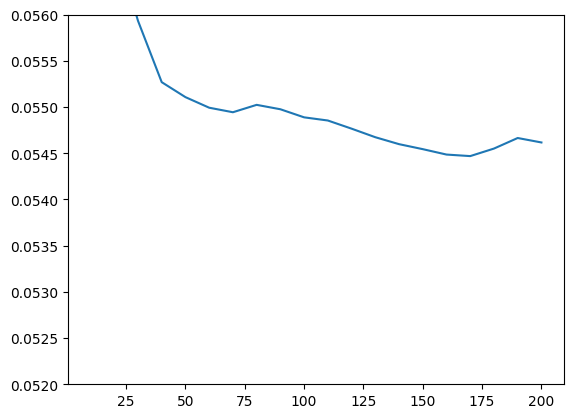

In [15]:
plt.plot(range(10,201,10), scores)
plt.ylim((0.052, 0.056))

In [16]:
scores = []
for depth in [10, 15, 20, 25]:
    for estimators in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=estimators, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        scores.append((depth, estimators,mean_squared_error(y_val, y_pred)))

In [17]:
columns = ["depth", "estimators", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

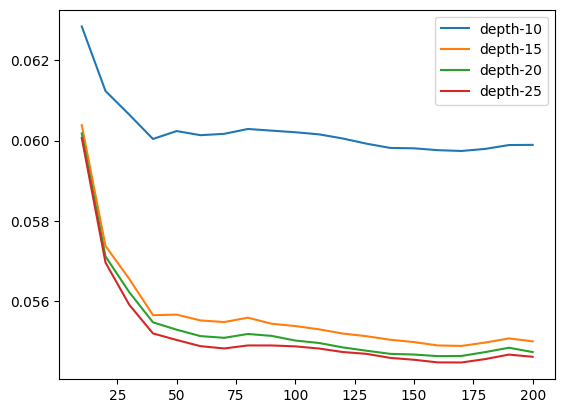

In [18]:
for depth in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores["depth"] == depth]
    plt.plot(df_subset["estimators"], df_subset["rmse"], label="depth-%d" % depth)

plt.legend()

In [19]:
for depth in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores["depth"] == depth]
    print(f"depth: {depth}, mean rmse: {round(df_subset.rmse.mean(), 4)}")

depth: 10, mean rmse: 0.0602
depth: 15, mean rmse: 0.0557
depth: 20, mean rmse: 0.0554
depth: 25, mean rmse: 0.0552


In [20]:
rt = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rt.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [21]:
d = dict(zip(dv.get_feature_names_out(),rt.feature_importances_))
sorted(d.items(), key=lambda item: item[1], reverse=True)

[('median_income', 0.33566849340251753),
 ('ocean_proximity=<1H OCEAN', 0.29247296545343116),
 ('latitude', 0.10189141894557846),
 ('longitude', 0.08617580381806568),
 ('ocean_proximity=INLAND', 0.07380644294557998),
 ('housing_median_age', 0.030194348002947978),
 ('population', 0.026820690830484637),
 ('total_rooms', 0.021771553653737723),
 ('total_bedrooms', 0.01624480660362488),
 ('households', 0.014953476344031812)]

In [22]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [23]:
features = dv.get_feature_names_out()
features= [i.replace("=<", "_") for i in features]
dtrain = xgb.DMatrix(X_train, y_train, feature_names=features)
dval = xgb.DMatrix(X_val, y_val, feature_names=features)

In [24]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [25]:
y_pred = model.predict(dval)

In [26]:
mean_squared_error(y_val, y_pred)

0.05226856756914353

In [27]:
xgb_params_2 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [28]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [29]:
y_pred = model.predict(dval)

In [30]:
mean_squared_error(y_val, y_pred)

0.05226856756914353